# **Simple Preomics**


## 1. Data Loading and Pre-processing

### 1.1 Import libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO
import os



# check versions of libraries used. 
print("Pandas version: {}".format(pd.__version__))
print("matplotlib version: {}".format(matplotlib.__version__))
print("seaborn version: {}".format(sns.__version__))


Pandas version: 2.2.3
matplotlib version: 3.10.1
seaborn version: 0.13.2


### 1.2 Import fasta data file and convert it to dataframe

In [2]:
# Load fasta protein data. Using SeqIO we will parse the data and convert it into a dataframe.

# setup empty lists to populate dataframe. 
seq = [] # Protein sequence 
seq_id = [] # patient/data/protein id?
#seq_name = [] # protein name 
seq_description = [] # full description for fasta file
seq_ProteinName = [] # protein Name


# create pandas dataframe to make sorting and etc easier. First we will use SeqIO from Biopython library to parse fasta data. 
for seq_record in SeqIO.parse('uniprot_sprot_2021-01-04_HUMAN.fasta.txt','fasta'):
    seq.append(str(seq_record.seq))
    seq_id.append(str(seq_record.id).split('|')[1])
    seq_description.append(str(seq_record.description))
    seq_ProteinName.append(seq_record.name.split('|')[-1])

dictseq = {'ProteinName':seq_ProteinName, 'id':seq_id, 'description':seq_description, 'sequence':seq}
protein_data = pd.DataFrame(dictseq) # convert to dataframe

# split description to remove names
protein_data['description'] = protein_data['description'].str.split(' ', expand = True, n = 1)[1]


print('Data loading done.')

Data loading done.


In [3]:
display(protein_data.shape)
protein_data.head()

(20394, 4)

,ProteinName,id,description,sequence
0,1433B_HUMAN,P31946,14-3-3 protein beta/alpha OS=Homo sapiens OX=9...,MTMDKSELVQKAKLAEQAERYDDMAAAMKAVTEQGHELSNEERNLL...
1,1433E_HUMAN,P62258,14-3-3 protein epsilon OS=Homo sapiens OX=9606...,MDDREDLVYQAKLAEQAERYDEMVESMKKVAGMDVELTVEERNLLS...
2,1433F_HUMAN,Q04917,14-3-3 protein eta OS=Homo sapiens OX=9606 GN=...,MGDREQLLQRARLAEQAERYDDMASAMKAVTELNEPLSNEDRNLLS...
3,1433G_HUMAN,P61981,14-3-3 protein gamma OS=Homo sapiens OX=9606 G...,MVDREQLVQKARLAEQAERYDDMAAAMKNVTELNEPLSNEERNLLS...
4,1433S_HUMAN,P31947,14-3-3 protein sigma OS=Homo sapiens OX=9606 G...,MERASLIQKAKLAEQAERYEDMAAFMKGAVEKGEELSCEERNLLSV...


In [4]:
import re
    
def parse_protein_info(text):
    """Parse protein information string into a dictionary"""
    fields = {}
    
    # Define patterns for each field
    patterns = {
        # Match everything after OS= until the next field marker (space + 2 uppercase letters + =) or end of string
        'OS': r'OS=(.+?)(?=\s+[A-Z]{2}=|\s*$)',
        # Match digits after OX=
        'OX': r'OX=(\d+)',
        # Match everything after GN= until the next field marker or end of string
        'GN': r'GN=(.+?)(?=\s+[A-Z]{2}=|\s*$)',
        # Match digits after PE=
        'PE': r'PE=(\d+)',
        # Match digits after SV=
        'SV': r'SV=(\d+)'
    }
    for field, pattern in patterns.items():
        match = re.search(pattern, text)
        fields[field] = match.group(1).strip() if match else None
    
    return fields

# Apply the parsing function to the 'description' column
parsed_data = protein_data['description'].apply(parse_protein_info)
parsed_df = pd.DataFrame(parsed_data.tolist())


protein_data = protein_data.join(parsed_df)
protein_data.head()

,ProteinName,id,description,sequence,OS,OX,GN,PE,SV
0,1433B_HUMAN,P31946,14-3-3 protein beta/alpha OS=Homo sapiens OX=9...,MTMDKSELVQKAKLAEQAERYDDMAAAMKAVTEQGHELSNEERNLL...,Homo sapiens,9606,YWHAB,1,3
1,1433E_HUMAN,P62258,14-3-3 protein epsilon OS=Homo sapiens OX=9606...,MDDREDLVYQAKLAEQAERYDEMVESMKKVAGMDVELTVEERNLLS...,Homo sapiens,9606,YWHAE,1,1
2,1433F_HUMAN,Q04917,14-3-3 protein eta OS=Homo sapiens OX=9606 GN=...,MGDREQLLQRARLAEQAERYDDMASAMKAVTELNEPLSNEDRNLLS...,Homo sapiens,9606,YWHAH,1,4
3,1433G_HUMAN,P61981,14-3-3 protein gamma OS=Homo sapiens OX=9606 G...,MVDREQLVQKARLAEQAERYDDMAAAMKNVTELNEPLSNEERNLLS...,Homo sapiens,9606,YWHAG,1,2
4,1433S_HUMAN,P31947,14-3-3 protein sigma OS=Homo sapiens OX=9606 G...,MERASLIQKAKLAEQAERYEDMAAFMKGAVEKGEELSCEERNLLSV...,Homo sapiens,9606,SFN,1,1


In [5]:
display(parsed_df.shape)
display(protein_data.shape)

(20394, 5)

(20394, 9)

In [6]:
protein_data.describe()

,ProteinName,id,description,sequence,OS,OX,GN,PE,SV
count,20394,20394,20394,20394,20394,20394,20252,20394,20394
unique,20394,20394,20394,20323,1,1,20172,5,9
top,ZZZ3_HUMAN,Q8IYH5,ZZ-type zinc finger-containing protein 3 OS=Ho...,MALPTPSDSTLPAEARGRGRRRRLVWTPSQSEALRACFERNPYPGI...,Homo sapiens,9606,HERVK_113,1,1
freq,1,1,1,5,20394,20394,5,16373,9426


In [7]:
protein_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ProteinName  20394 non-null  object
 1   id           20394 non-null  object
 2   description  20394 non-null  object
 3   sequence     20394 non-null  object
 4   OS           20394 non-null  object
 5   OX           20394 non-null  object
 6   GN           20252 non-null  object
 7   PE           20394 non-null  object
 8   SV           20394 non-null  object
dtypes: object(9)
memory usage: 1.4+ MB


#### Fasta Data File
The fasta data file was parsed through using SeqIO function from Biopython package. The raw data consists of multiple lines starting wtih '>SV'. This data was parsed and converted into a dataframe with columns consisting ID, description, and protein sequence. Description fasta headers also separated into different columns: OS=OrganismName, OX=Organism Identifier, GN=GeneName, PE=ProteinExistence, SV=SequenceVersion. After preprocessing, following can be observed: 
* There are 20394 entries in this data. 
* Protein Name, id, and protein sequence does not have any missing values.
* All protein names are unique but not all protein sequences are unique.
* 71 entries does not have unique protein sequences (0.003%) and "MALPTPSDSTLPAEARGRGRRRRLVWTPSQSEALRACFERNPYPGI...." sequence has frequency 5 in the data.
* All known data entries are from Homo sapiens
* There are 142 GN values missing from original data. 


### 1.3 Import tools A & B


In [8]:
# import tools A & B .tsv file
tool_A = pd.read_csv('tool_A_results.tsv',sep = '\t',index_col=0)
tool_B = pd.read_csv('tool_B_results.tsv', sep = '\t')

In [9]:
''' some tool A inputs have multiple entries e.g. H2B1K_HUMAN;H2BFS_HUMAN;H2B1D_HUMAN so we need to break these apart. 
also "StrippedSequence" == Peptide Sequence so need to rename'''
print(f'tool_A original shape =' ,tool_A.shape)

# splitting multiple entries and we adding them back in as separate entry. 
tool_A['ProteinName'] = tool_A['ProteinName'].str.split(';')
tool_A = tool_A.explode('ProteinName')
print(f'tool_A after shape =' ,tool_A.shape)
tool_A = tool_A.rename(columns = {'StrippedSequence': 'Peptide_Seq'})


tool_A original shape = (91419, 2)
tool_A after shape = (92415, 2)


In [10]:
# tool_B protein name needs to be split to be consistent with other data
split_tool_B_name = tool_B.ProteinName.str.split("|", expand = True) # spliting based on |
tool_B["ProteinName"] = split_tool_B_name[2] # same protein name convention as input data and tool_A. 
tool_B["id"] = split_tool_B_name[1] # same id name convention as input data. 
tool_B = tool_B.rename(columns = {'Sequence': 'Peptide_Seq'})
print(f'tool_B shape =' ,tool_B.shape)


tool_B shape = (82732, 3)


In [11]:
display(tool_A.head())
display(tool_A.describe(include =['O']))
display(tool_B.head())
display(tool_B.describe(include =['O']))

,ProteinName,Peptide_Seq
index,,
0,SRC8_HUMAN,PVEAVTSK
1,APT_HUMAN,LQAEVLECVSLVELTSLK
2,TRXR1_HUMAN,VVYENAYGQFIGPHR
4,GALD1_HUMAN,AMEFVDVTESNAR
5,TRADD_HUMAN,VVLSDAYAHPQQK


,ProteinName,Peptide_Seq
count,92415,92415
unique,4984,53158
top,AHNK_HUMAN,HQGVMVGMGQK
freq,879,30


,ProteinName,Peptide_Seq,id
0,1433E_HUMAN,MDDREDLVYQAK,P62258
1,1433E_HUMAN,MDDREDLVYQAK,P62258
2,1433E_HUMAN,MDDREDLVYQAK,P62258
3,1433E_HUMAN,MDDREDLVYQAK,P62258
4,1433E_HUMAN,MDDREDLVYQAK,P62258


,ProteinName,Peptide_Seq,id
count,82732,82732,82732
unique,2497,16395,2497
top,FLNA_HUMAN,LMIEMDGTENK,P21333
freq,1303,82,1303


## 2. Observation

### 2.1 Find number of Unique **Peptides** in Tool A and Tool B

In [12]:
unique_peptide_A = tool_A['Peptide_Seq'].nunique()
unique_peptide_B = tool_B['Peptide_Seq'].nunique()

print(f"TOOL-A found {unique_peptide_A} unique peptides sequences")
print(f"TOOL-B found {unique_peptide_B} unique peptides sequences")

TOOL-A found 53158 unique peptides sequences
TOOL-B found 16395 unique peptides sequences


C:\Users\kk_71\AppData\Local\Temp\ipykernel_21836\809819754.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['TOOL-A', 'TOOL-B'], y=[unique_peptide_A, unique_peptide_B], palette='viridis')


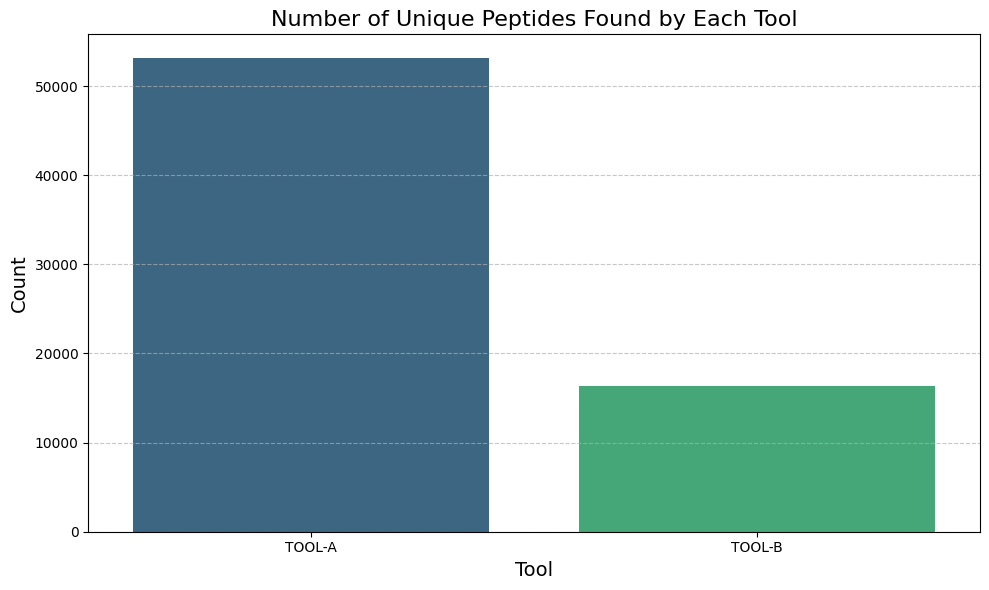

In [13]:
# Visualize the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=['TOOL-A', 'TOOL-B'], y=[unique_peptide_A, unique_peptide_B], palette='viridis')
plt.title('Number of Unique Peptides Found by Each Tool', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Tool', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

TOOL-A found 4984 unique proteins names
TOOL-B found 2497 unique proteins names


C:\Users\kk_71\AppData\Local\Temp\ipykernel_21836\1557883408.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['TOOL-A', 'TOOL-B'], y=[unique_proteins_name_A, unique_proteins_name_B], palette='viridis')


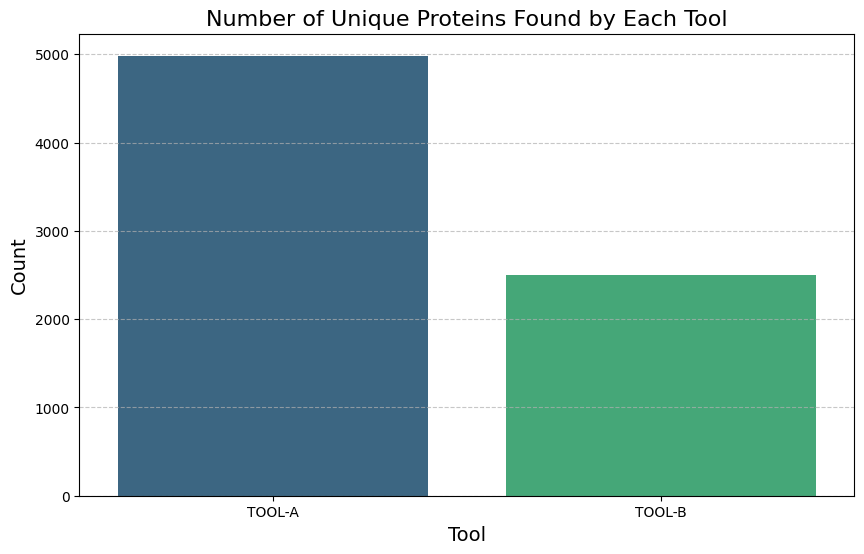

In [14]:
# Count unique proteins for each tool
unique_proteins_name_A = tool_A['ProteinName'].nunique()
unique_proteins_name_B = tool_B['ProteinName'].nunique()

print(f"TOOL-A found {unique_proteins_name_A} unique proteins names")
print(f"TOOL-B found {unique_proteins_name_B} unique proteins names")

# Visualize the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=['TOOL-A', 'TOOL-B'], y=[unique_proteins_name_A, unique_proteins_name_B], palette='viridis')
plt.title('Number of Unique Proteins Found by Each Tool', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Tool', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.tight_layout()
plt.show()

In [17]:
tool_A_protein_name_counts  = tool_A.ProteinName.value_counts()
tool_A_peptide_counts = tool_A.Peptide_Seq.value_counts()
tool_B_protein_name_counts  = tool_B.ProteinName.value_counts()
tool_B_peptide_counts = tool_B.Peptide_Seq.value_counts()

display(tool_A_protein_name_counts)

ProteinName
AHNK_HUMAN     879
FLNA_HUMAN     729
FAS_HUMAN      560
DYHC1_HUMAN    460
               393
              ... 
B2L12_HUMAN      1
ZMIZ2_HUMAN      1
RHG39_HUMAN      1
AT10B_HUMAN      1
MED10_HUMAN      1
Name: count, Length: 4984, dtype: int64

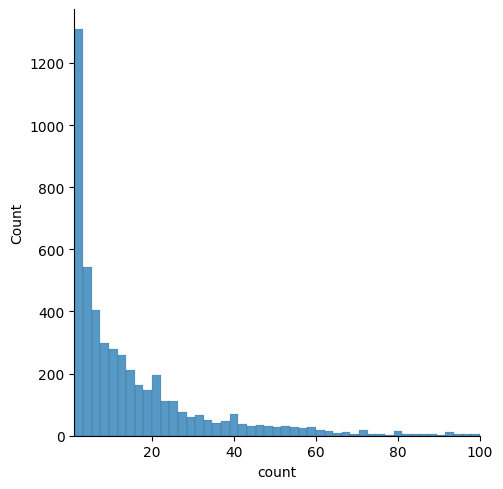

In [20]:
sns.displot(tool_A_protein_name_counts).set(xlim=(1,100))

#### Tools A and B File
Tools A and B both have peptide sequence and protein name identifiers but are in different format. Therefore these data were processed to have same dataframe convention for easier use. 
##### **Tool A**
* original data had 91419 entries but some had multiple entries in single line. Therefore final count was: 92415 entries.
* There are a lot of repeated entries in this tool. 4984/92415 (5.39%) names are unique and 53158/92415 (57.52%) peptide sequences are unique.
* highest occurrence of repeated peptide name was: AHNK_HUMAN with occurence of 879
* highest occurrence of repeated peptide sequence was: HQGVMVGMGQK with occurence of 30

##### **Tool B**
* Tool B had total of 82732 data.
* 2497/82732 (3.01%) are unique names and 16395/82732 (19.82%) are unique peptide sequences.
* highest occurrence of repeated peptide name was: FLNA_HUMAN with occurence of 1303
* highest occurrence of repeated peptide sequence was: LMIEMDGTENK with occurence of 82

##### Comparison
* Tool A has more number of entries than Tool B
* Tool A has more unique protein names and peptide sequence

## 3. Processing

### 3.1. Simplified Semi Tryptic

In [97]:
def is_simplified_semi_tryptic(peptide_seq, protein_seq):
    """Determine if a peptide is Simplified-Semi-Tryptic."""
    if peptide_seq not in protein_seq:
        return False
    
    # Find the first occurrence of the peptide in the protein sequence
    start_idx = protein_seq.find(peptide_seq)
    
    # Check if peptide is at the start of the protein sequence
    if start_idx == 0:
        # Consider as if preceding amino acid ends with K or R
        preceding_ends_with_kr = True
    else:
        # Check if the preceding amino acid ends with K or R
        preceding_ends_with_kr = protein_seq[start_idx - 1] in ['K', 'R']
    
    # Check if peptide ends with K or R
    peptide_ends_with_kr = peptide_seq[-1] in ['K', 'R']
    
    # Apply the Simplified-Semi-Tryptic criteria
    return (peptide_ends_with_kr and not preceding_ends_with_kr) or \
           (not peptide_ends_with_kr and preceding_ends_with_kr)

# Function to analyze peptides for each tool
def analyze_simplified_semi_tryptic(df_tool, df_data):
    """Analyze peptides to determine if they are Simplified-Semi-Tryptic."""
    results = []
    for index, row in df_tool.iterrows():
        protein_name = row['ProteinName']
        peptide_seq = row['Peptide_Seq']
        
        if any(df_data.ProteinName == protein_name):
            #nd_protein = df_data[df_data['ProteinName'].isin([protein_name]).index]
            ind_protein =df_data.loc[df_data['ProteinName'].isin([protein_name])].index
            protein_seq = df_data['sequence'][ind_protein].item()
            #print(f"Protein Name: {protein_name}")
            #print(f"Peptide sequence: {peptide_seq}")
            #print(f"protein seq: {protein_seq}")
            is_sst = is_simplified_semi_tryptic(peptide_seq, protein_seq)
            results.append(is_sst)
        else:
            # If protein name not found, it's not Simplified-Semi-Tryptic
            results.append(False)
    
    return results

In [98]:
isExist = os.path.exists('tool_A_wIsSST.csv') 
print(isExist)

# to save computation we will save/open the output here. 
if isExist:
    tool_A = pd.read_csv('tool_A_wIsSST.csv')
    tool_B = pd.read_csv('tool_B_wIsSST.csv')
else:
    # run and find analyze_simplified_semi_tryptic
    tool_A['IsSST'] = analyze_simplified_semi_tryptic(tool_A, protein_data)
    tool_B['IsSST'] = analyze_simplified_semi_tryptic(tool_B, protein_data)
    # save the output
    tool_A.to_csv('tool_A_wIsSST.csv',sep = ',' )
    tool_B.to_csv('tool_B_wIsSST.csv',sep = ',' )




# Calculate the ratio of Simplified-Semi-Tryptic peptides for each tool
sst_ratio_a = tool_A['IsSST'].mean()
sst_ratio_b = tool_B['IsSST'].mean()

print(f"TOOL-A: {sst_ratio_a:.2%} of peptides are Simplified-Semi-Tryptic")
print(f"TOOL-B: {sst_ratio_b:.2%} of peptides are Simplified-Semi-Tryptic")


True
TOOL-A: 31.49% of peptides are Simplified-Semi-Tryptic
TOOL-B: 22.12% of peptides are Simplified-Semi-Tryptic


C:\Users\kk_71\AppData\Local\Temp\ipykernel_4616\865467625.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['TOOL-A', 'TOOL-B'], y=[sst_ratio_a, sst_ratio_b], palette='viridis')


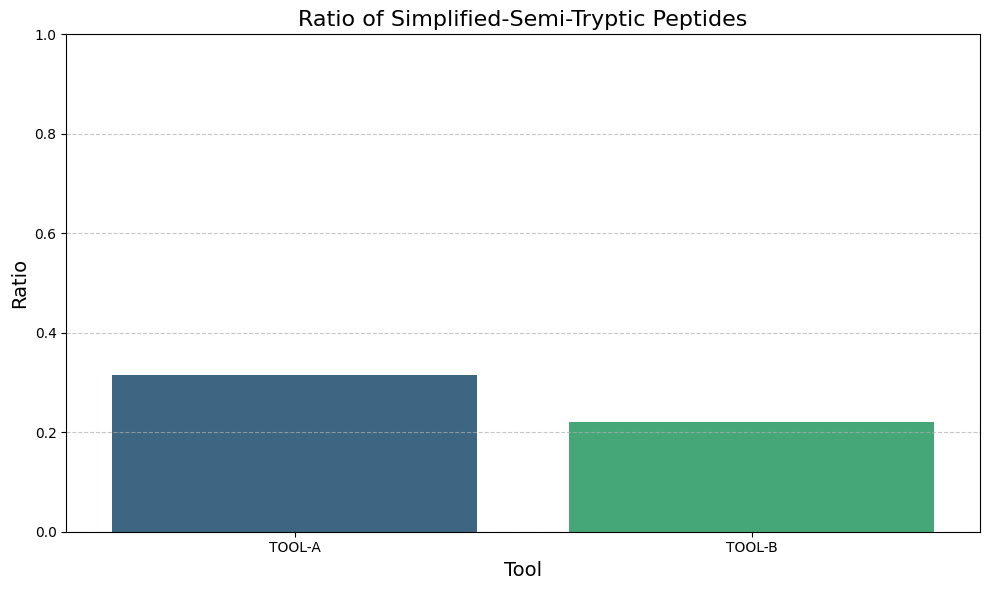

In [102]:
# Visualize the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=['TOOL-A', 'TOOL-B'], y=[sst_ratio_a, sst_ratio_b], palette='viridis')
plt.title('Ratio of Simplified-Semi-Tryptic Peptides', fontsize=16)
plt.ylabel('Ratio', fontsize=14)
plt.xlabel('Tool', fontsize=14)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 3.2. Protein Sequence Coverage

Now, let's calculate the protein sequence coverage for each tool. Protein sequence coverage is defined as the ratio of the length of the found sequences to the total length of the protein sequence.

In [103]:
def calculate_coverage(df_tool, df_data):
    """Calculate protein sequence coverage for each protein."""
    coverage_dict = {}
    # get unique values
    grouped = df_tool['ProteinName'].unique()
    for protein_name in grouped:
       # if protein name is in data set
        if df_data["ProteinName"].isin([protein_name]).any():
            
            # get all the index and values 
            ind_protein =df_data.loc[df_data['ProteinName'].isin([protein_name])].index
            protein_seq = df_data['sequence'][ind_protein].item()
            
            # calculate protein length
            protein_length = len(protein_seq)
            
            # Get unique peptides for this protein
            peptides = df_tool['Peptide_Seq'].unique()
            
            # Create a boolean array to track covered positions
            covered = [False] * protein_length
            for peptide in peptides:
                if peptide in protein_seq:
                    start_idx = protein_seq.find(peptide)
                    end_idx = start_idx + len(peptide)
                    
                    # Mark positions as covered
                    for i in range(start_idx, end_idx):
                        covered[i] = True
            
            # Calculate coverage
            coverage = sum(covered) / protein_length
            coverage_dict[protein_name] = [coverage, sum(covered), protein_length]
            #coverage_dict2[protein_name] = 
    return coverage_dict



In [104]:
# Calculate coverage for both tools

#new_tool_A = tool_A.copy(deep=True)
#coverage_a, coverage_a2 = calculate_coverage(new_tool_A.iloc[0:50], protein_data.iloc[0:10000])
#coverage_b = calculate_coverage(tool_B.iloc[0:10], protein_data.iloc[0:1000])
isExist = os.path.exists('df_coverage_a.csv') 
print(f'does processed data exists? {isExist}')

#to save computation we will save/open the output here. 
if isExist:
    df_coverage_a = pd.read_csv('df_coverage_a.csv')
    df_coverage_b = pd.read_csv('df_coverage_b.csv')
else:
    coverage_a = calculate_coverage(tool_A, protein_data)
    coverage_b = calculate_coverage(tool_B, protein_data)
    # covert to a dataframe Tool A
    df_coverage_a = pd.DataFrame.from_dict(coverage_a, orient = 'index')
    df_coverage_a = df_coverage_a.set_axis(['coverage','len_found','len_protein'], axis = 1)#columns = {'0': 'coverage','1': 'len_found','2':'len_protein'})

    # covert to a dataframe Tool B
    df_coverage_b = pd.DataFrame.from_dict(coverage_b, orient = 'index')
    df_coverage_b = df_coverage_b.set_axis(['coverage','len_found','len_protein'], axis = 1)#columns = {'0': 'coverage','1': 'len_found','2':'len_protein'})

    # save to CSV file
    df_coverage_a.to_csv('df_coverage_a.csv',sep = ',' )
    df_coverage_b.to_csv('df_coverage_b.csv',sep = ',' )


does processed data exists? True


In [105]:
display(df_coverage_a.head())
display(df_coverage_b.head())

,Unnamed: 0,coverage,len_found,len_protein
0,SRC8_HUMAN,0.327273,180,550
1,APT_HUMAN,0.838889,151,180
2,TRXR1_HUMAN,0.448382,291,649
3,GALD1_HUMAN,0.259091,57,220
4,TRADD_HUMAN,0.233974,73,312


,Unnamed: 0,coverage,len_found,len_protein
0,1433E_HUMAN,0.760784,194,255
1,EIF3G_HUMAN,0.237500,76,320
2,STIP1_HUMAN,0.453039,246,543
3,GATA3_HUMAN,0.130926,58,443
4,FLNA_HUMAN,0.504345,1335,2647


In [106]:
# Calculate average coverage
avg_coverage_a = df_coverage_a.coverage.mean()
avg_coverage_b = df_coverage_b.coverage.mean()

# Coverage
print(f"TOOL-A: IQR protein sequence coverage = {avg_coverage_a:.2%}")
print(f"TOOL-B: IQR protein sequence coverage = {avg_coverage_b:.2%}")
IQR_coverage_a = [df_coverage_a.coverage.median() * 100, df_coverage_a.coverage.quantile(0.25)*100, df_coverage_a.coverage.quantile(0.75)*100]
IQR_coverage_b = [df_coverage_b.coverage.median()*100, df_coverage_b.coverage.quantile(0.25)*100, df_coverage_b.coverage.quantile(0.75)*100]
print(f"TOOL-A: IQR protein sequence coverage = {IQR_coverage_a}")
print(f"TOOL-B: IQR protein sequence coverage = {IQR_coverage_b}")

print('='* 100)

# Len found
print(f"TOOL-A: Average length of found = {df_coverage_a.len_found.mean()}")
print(f"TOOL-B: Average length of found = {df_coverage_b.len_found.mean()}")
IQR_length_fa = [df_coverage_a.len_found.median(), df_coverage_a.len_found.quantile(0.25), df_coverage_a.len_found.quantile(0.75)]
IQR_length_fb = [df_coverage_b.len_found.median(), df_coverage_b.len_found.quantile(0.25), df_coverage_b.len_found.quantile(0.75)]
print(f"TOOL-A: IQR Protein found length = {IQR_length_fa}")
print(f"TOOL-B: IQR Protein found length = {IQR_length_fb}")
print('='* 100)

# len protein
print(f"TOOL-A: Average length of found = {df_coverage_a.len_protein.mean()}")
print(f"TOOL-B: Average length of found = {df_coverage_b.len_protein.mean()}")
IQR_length_fa = [df_coverage_a.len_protein.median(), df_coverage_a.len_protein.quantile(0.25), df_coverage_a.len_protein.quantile(0.75)]
IQR_length_fb = [df_coverage_b.len_protein.median(), df_coverage_b.len_protein.quantile(0.25), df_coverage_b.len_protein.quantile(0.75)]
print(f"TOOL-A: IQR Protein  length = {IQR_length_fa}")
print(f"TOOL-B: IQR Protein  length = {IQR_length_fb}")
print('='* 100)



#print(f"TOOL-A: Average length of found = {df_coverage_a.len_protein.mean()}")
#print(f"TOOL-B: Average length of found = {df_coverage_b.len_protein.mean()}")

TOOL-A: IQR protein sequence coverage = 22.05%
TOOL-B: IQR protein sequence coverage = 16.27%
TOOL-A: IQR protein sequence coverage = [np.float64(16.74326713714347), np.float64(6.67059131344845), np.float64(32.27387653849823)]
TOOL-B: IQR protein sequence coverage = [np.float64(12.643678160919539), np.float64(5.593339804744735), np.float64(23.579686139239424)]
TOOL-A: Average length of found = 107.86733870967743
TOOL-B: Average length of found = 72.93054997992773
TOOL-A: IQR Protein found length = [np.float64(72.0), np.float64(32.75), np.float64(140.0)]
TOOL-B: IQR Protein found length = [np.float64(48.0), np.float64(24.0), np.float64(90.0)]
TOOL-A: Average length of found = 647.3610887096775
TOOL-B: Average length of found = 582.2906463267764
TOOL-A: IQR Protein  length = [np.float64(479.0), np.float64(290.0), np.float64(796.0)]
TOOL-B: IQR Protein  length = [np.float64(433.0), np.float64(254.5), np.float64(715.0)]


##### Tool A:
**Protein Sequence Coverage**
Mean: 22.05%
Median IQR: 16.74% [6.67 - 32.27]%

**len Protein found**
Mean: 108
Median IQR: 72 [32.75-140]

**len Protein**
Mean: 647
Median IQR: 479 [290-796]
##### Tool B:
**Protein Sequence Coverage**
Mean: 16.27%
Median IQR: 12.64% [5.59 - 23.58]%

**len Protein found**
Mean: 72
Median IQR: 48 [24-90]

**len Protein**
Mean: 582
Median IQR: 433 [255-715]

C:\Users\kk_71\AppData\Local\Temp\ipykernel_5636\3380240016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['TOOL-A', 'TOOL-B'], y=[avg_coverage_a, avg_coverage_b], palette='viridis')


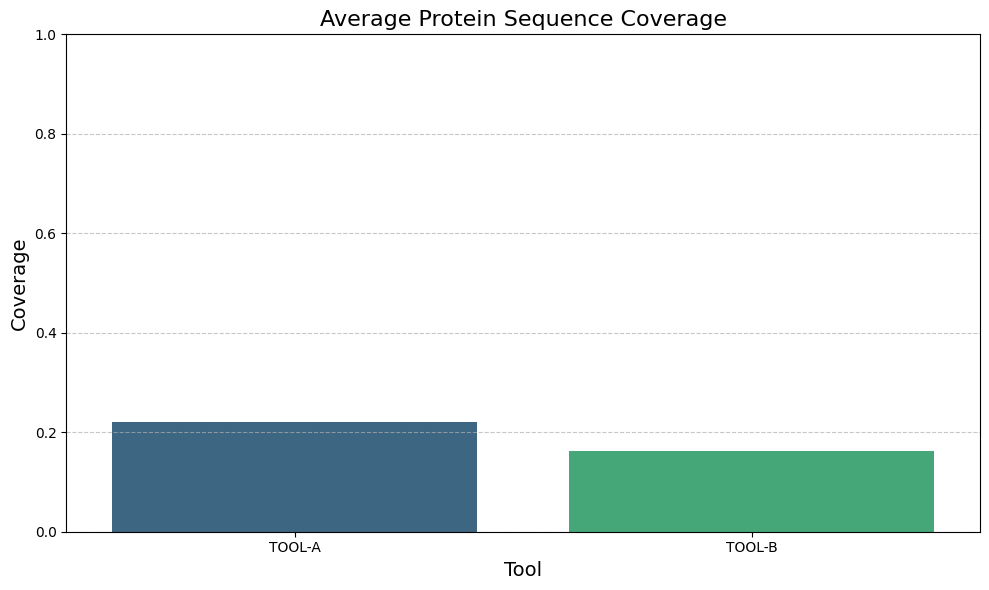

In [23]:
# Visualize the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=['TOOL-A', 'TOOL-B'], y=[avg_coverage_a, avg_coverage_b], palette='viridis')
plt.title('Average Protein Sequence Coverage', fontsize=16)
plt.ylabel('Coverage', fontsize=14)
plt.xlabel('Tool', fontsize=14)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [24]:
display(df_coverage_a.head())
display(df_coverage_a.head())
display(tool_A.head())
display(tool_B.head())

,Unnamed: 0,coverage,len_found,len_protein
0,SRC8_HUMAN,0.327273,180,550
1,APT_HUMAN,0.838889,151,180
2,TRXR1_HUMAN,0.448382,291,649
3,GALD1_HUMAN,0.259091,57,220
4,TRADD_HUMAN,0.233974,73,312


,Unnamed: 0,coverage,len_found,len_protein
0,SRC8_HUMAN,0.327273,180,550
1,APT_HUMAN,0.838889,151,180
2,TRXR1_HUMAN,0.448382,291,649
3,GALD1_HUMAN,0.259091,57,220
4,TRADD_HUMAN,0.233974,73,312


,index,ProteinName,Peptide_Seq,IsSST
0,0,SRC8_HUMAN,PVEAVTSK,True
1,1,APT_HUMAN,LQAEVLECVSLVELTSLK,False
2,2,TRXR1_HUMAN,VVYENAYGQFIGPHR,False
3,4,GALD1_HUMAN,AMEFVDVTESNAR,False
4,5,TRADD_HUMAN,VVLSDAYAHPQQK,False


,Unnamed: 0,ProteinName,Peptide_Seq,id,IsSST
0,0,1433E_HUMAN,MDDREDLVYQAK,P62258,False
1,1,1433E_HUMAN,MDDREDLVYQAK,P62258,False
2,2,1433E_HUMAN,MDDREDLVYQAK,P62258,False
3,3,1433E_HUMAN,MDDREDLVYQAK,P62258,False
4,4,1433E_HUMAN,MDDREDLVYQAK,P62258,False


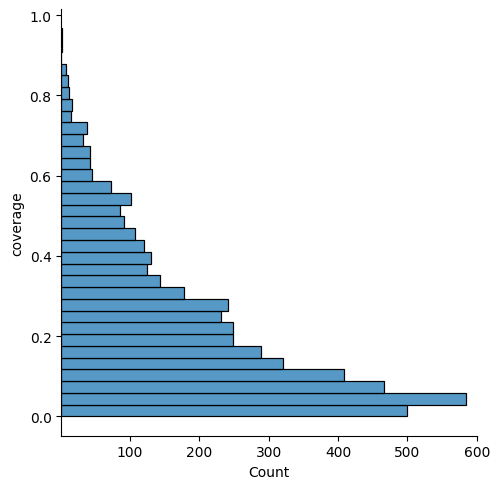

In [38]:
sns.displot(df_coverage_a, y= 'coverage' ).set(xlim=(1,600))

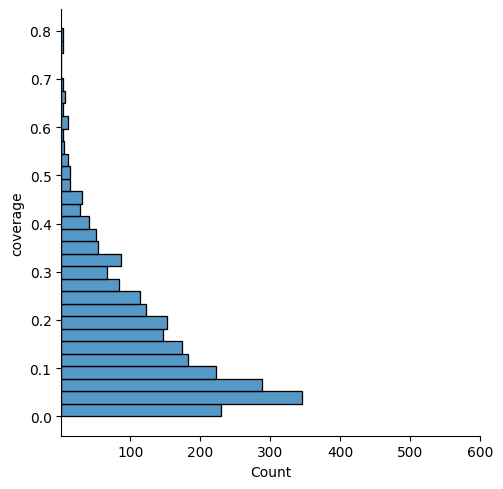

In [37]:
sns.displot(df_coverage_b, y= 'coverage' ).set(xlim=(1,600))

## 4. Overall performance

In [25]:
# Create a summary DataFrame
summary_data = {
    'Criterion': [
        'Unique Peptides',
        'Unique Proteins',
        'Simplified-Semi-Tryptic Ratio',
        'Average Protein Coverage'
    ],
    'TOOL-A': [
        unique_peptide_A,
        unique_proteins_name_A,
        sst_ratio_a,
        avg_coverage_a
    ],
    'TOOL-B': [
        unique_peptide_B,
        unique_proteins_name_B,
        sst_ratio_b,
        avg_coverage_b
    ]
}

summary_df = pd.DataFrame(summary_data)


In [26]:
summary_df

,Criterion,TOOL-A,TOOL-B
0,Unique Peptides,53158.000000,16395.000000
1,Unique Proteins,4984.000000,2497.000000
2,Simplified-Semi-Tryptic Ratio,0.314927,0.221245
3,Average Protein Coverage,0.220540,0.162669


In [27]:
# Add a column to indicate which tool performed better for each criterion
summary_df['Better Tool'] = summary_df.apply(
    lambda row: 'TOOL-A' if row['TOOL-A'] > row['TOOL-B'] else 'TOOL-B' if row['TOOL-B'] > row['TOOL-A'] else 'Equal',
    axis=1
)

# Format the values for better readability
summary_df['TOOL-A'] = summary_df.apply(
    lambda row: f"{row['TOOL-A']:.2%}" if row['Criterion'] in ['Simplified-Semi-Tryptic Ratio', 'Average Protein Coverage'] else row['TOOL-A'],
    axis=1
)

summary_df['TOOL-B'] = summary_df.apply(
    lambda row: f"{row['TOOL-B']:.2%}" if row['Criterion'] in ['Simplified-Semi-Tryptic Ratio', 'Average Protein Coverage'] else row['TOOL-B'],
    axis=1
)

display(summary_df)

,Criterion,TOOL-A,TOOL-B,Better Tool
0,Unique Peptides,53158.0,16395.0,TOOL-A
1,Unique Proteins,4984.0,2497.0,TOOL-A
2,Simplified-Semi-Tryptic Ratio,31.49%,22.12%,TOOL-A
3,Average Protein Coverage,22.05%,16.27%,TOOL-A


In [28]:
# Count how many criteria each tool wins
tool_a_wins = (summary_df['Better Tool'] == 'TOOL-A').sum()
tool_b_wins = (summary_df['Better Tool'] == 'TOOL-B').sum()
equal_wins = (summary_df['Better Tool'] == 'Equal').sum()

print(f"TOOL-A wins in {tool_a_wins} criteria")
print(f"TOOL-B wins in {tool_b_wins} criteria")
print(f"Tools are equal in {equal_wins} criteria")

# Determine the overall better tool
if tool_a_wins > tool_b_wins:
    better_tool = 'TOOL-A'
elif tool_b_wins > tool_a_wins:
    better_tool = 'TOOL-B'
else:
    better_tool = 'Equal'

print(f"\nOverall better tool: {better_tool}")


TOOL-A wins in 4 criteria
TOOL-B wins in 0 criteria
Tools are equal in 0 criteria

Overall better tool: TOOL-A


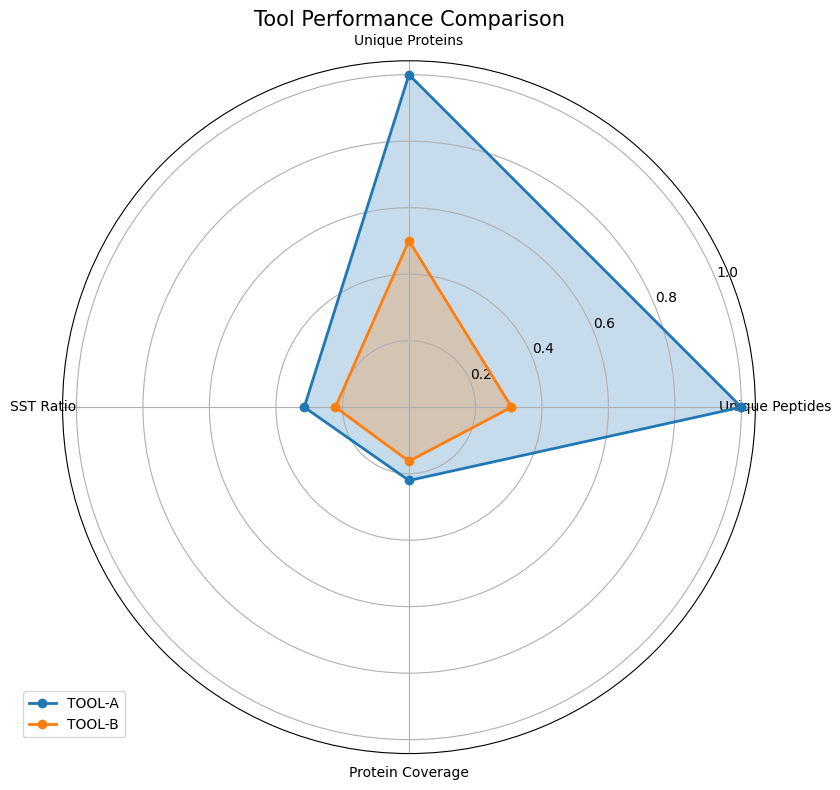

In [29]:
# Visualize the overall comparison
plt.figure(figsize=(12, 8))

# Prepare data for radar chart
categories = ['Unique Peptides', 'Unique Proteins', 'SST Ratio', 'Protein Coverage']
values_a = [unique_peptide_A / max(unique_peptide_A, unique_peptide_B),
           unique_proteins_name_A / max(unique_proteins_name_A, unique_proteins_name_B),
           sst_ratio_a,
           avg_coverage_a]
values_b = [unique_peptide_B / max(unique_peptide_A, unique_peptide_B),
           unique_proteins_name_B / max(unique_proteins_name_A, unique_proteins_name_B),
           sst_ratio_b,
           avg_coverage_b]

# Number of variables
N = len(categories)

# Create angles for each category
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Close the loop

# Add values for both tools (close the loop)
values_a += values_a[:1]
values_b += values_b[:1]

# Set up the plot
ax = plt.subplot(111, polar=True)

# Draw the lines and fill the areas
ax.plot(angles, values_a, 'o-', linewidth=2, label='TOOL-A')
ax.fill(angles, values_a, alpha=0.25)
ax.plot(angles, values_b, 'o-', linewidth=2, label='TOOL-B')
ax.fill(angles, values_b, alpha=0.25)

# Set category labels
plt.xticks(angles[:-1], categories)

# Add legend and title
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Tool Performance Comparison', size=15)

plt.tight_layout()
plt.show()

## 5. Conclusion

Based on our analysis, we can determine which tool performs better according to the given criteria.

Let's summarize our findings:

1. **Unique Peptides**: **TOOL-A** found more unique peptides. Tool-A: 53158 vs Tool-B: 16395
2. **Unique Proteins**: **TOOL-A** identified more unique proteins. Tool-A: 4984 vs Tool-B: 2497
3. **Simplified-Semi-Tryptic Ratio**: **TOOL-A** had a higher ratio of Simplified-Semi-Tryptic peptides. Tool-A: 31.49% vs Tool-B: 22.12%
4. **Protein Sequence Coverage**: **TOOL-A** achieved better protein sequence coverage. Tool-A: 22.05% vs Tool-B: 16.27%

Overall, **TOOL-A** demonstrates better performance in 4 out of 4 criteria, making it the superior tool for this specific protein and peptide analysis task.

The reasons for **TOOL-A**'s better performance could include:

1. More effective algorithms for peptide identification
2. Better handling of protein sequences
3. Higher sensitivity in detecting peptides
4. More accurate mapping of peptides to their source proteins

This analysis provides valuable insights for researchers to choose the appropriate tool for their protein and peptide analysis needs.